TASK - 1

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

In [5]:
import numpy as np

In [6]:
print(np.any(np.isnan(train_images)))
print(np.any(np.isnan(test_images)))

False
False


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

TASK - 2

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
def knn_experiment(k_values):
    accuracy_results = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_images, train_labels)
        predictions = knn.predict(test_images)
        accuracy = accuracy_score(test_labels, predictions)
        accuracy_results.append(accuracy)
        
        print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")
    
    return accuracy_results

Accuracy for k=3: 85.41%
Accuracy for k=5: 85.54%
Accuracy for k=7: 85.40%


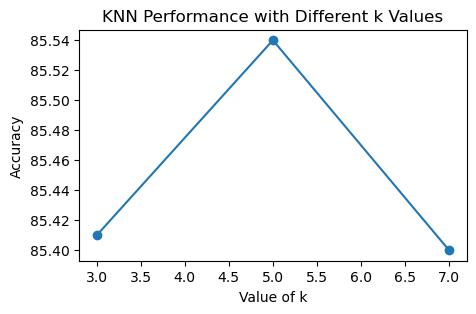

In [11]:
k_values = [3, 5, 7]
accuracy_results = knn_experiment(k_values)
accuracy_results = [i * 100 for i in accuracy_results]

plt.figure(figsize=(5, 3))
plt.plot(k_values, accuracy_results, marker='o')
plt.title("KNN Performance with Different k Values")
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

TASK - 3

In [12]:
from sklearn.svm import SVC

In [13]:
def svm_experiment(kernels, c_values):
    accuracy_results = []
    
    for kernel in kernels:
        for C in c_values:
            svm = SVC(kernel=kernel, C=C)
            svm.fit(train_images, train_labels)
            predictions = svm.predict(test_images)
            accuracy = accuracy_score(test_labels, predictions)
            accuracy_results.append((kernel, C, accuracy))
            print(f"Accuracy for kernel={kernel}, C={C}: {accuracy * 100:.2f}%")
    
    return accuracy_results

In [ ]:
kernels = ['linear', 'poly', 'rbf']
c_values = [0.1, 1, 10]
accuracy_results = svm_experiment(kernels, c_values)

plt.figure(figsize=(10, 6))

for kernel in kernels:
    kernel_results = [result[2] for result in accuracy_results if result[0] == kernel]
    plt.plot(c_values, kernel_results, marker='o', label=kernel)

plt.title("SVM Performance with Different Kernels and C Values")
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
TASK - 4

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_visualization():
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(train_images)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=train_labels, cmap='tab10', alpha=0.7)
    
    plt.title("t-SNE Visualization of Fashion MNIST Dataset")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(handles=scatter.legend_elements()[0], labels=[str(i) for i in range(10)], title="Classes")
    plt.colorbar(scatter)
    plt.show()

In [ ]:
tsne_visualization()

In [ ]:
TASK - 5

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_images, train_labels)
knn_predictions = knn.predict(test_images)

# Evaluation of the KNN model
knn_accuracy = accuracy_score(test_labels, knn_predictions)
knn_precision = precision_score(test_labels, knn_predictions, average='weighted')
knn_recall = recall_score(test_labels, knn_predictions, average='weighted')
knn_f1 = f1_score(test_labels, knn_predictions, average='weighted')
knn_cm = confusion_matrix(test_labels, knn_predictions)

print("KNN Model Performance:")
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"F1-Score: {knn_f1:.2f}")

# Plotting confusion matrix for KNN
plt.figure(figsize=(10, 7))
sns.heatmap(knn_cm, annot=True,fmt='d', cmap='cool', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
svm = SVC(kernel='rbf', C=1)
svm.fit(train_images, train_labels)
svm_predictions = svm.predict(test_images)

# Evaluation of the SVM model
svm_accuracy = accuracy_score(test_labels, svm_predictions)
svm_precision = precision_score(test_labels, svm_predictions, average='weighted')
svm_recall = recall_score(test_labels, svm_predictions, average='weighted')
svm_f1 = f1_score(test_labels, svm_predictions, average='weighted')
svm_cm = confusion_matrix(test_labels, svm_predictions)

print("SVM Model Performance:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Precision: {svm_precision:.2f}")
print(f"Recall: {svm_recall:.2f}")
print(f"F1-Score: {svm_f1:.2f}")

# Plot confusion matrix for SVM
plt.figure(figsize=(10, 7))
sns.heatmap(svm_cm, annot=True,fmt='d', cmap='cool', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()